In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-spotify-songs-2023/spotify-2023.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/top-spotify-songs-2023/spotify-2023.csv', encoding='latin-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [5]:
df.shape

(953, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [7]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [8]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

* The only key missing in the list of keys is C, as it makes sense to replace null values by C. However there's a good chance some of the songs might not have the key C.
* Replacing in_shazam_charts null values by 0 to make calculations easier.


In [9]:
df['key'].fillna('C',inplace=True)
df['in_shazam_charts'].fillna(0,inplace=True)

# Track Features Correlations

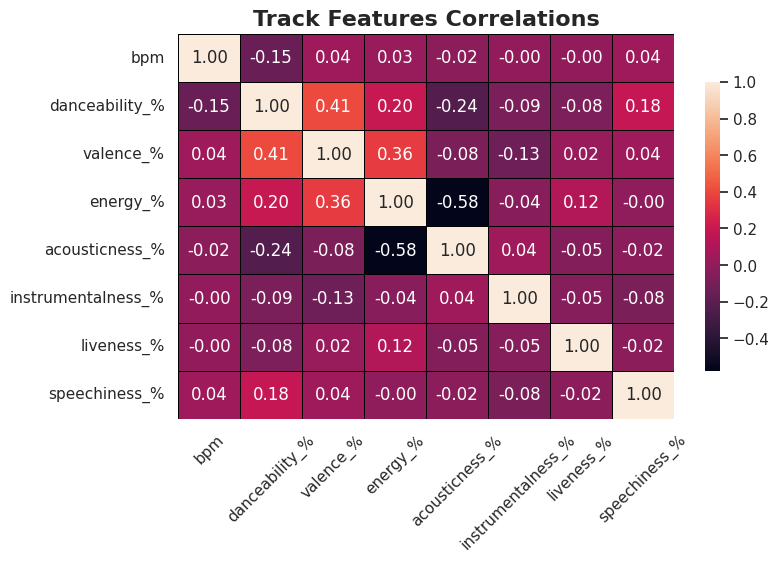

In [10]:
features = df[['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
c_m = features.corr()

plt.figure(figsize=(8, 5))
sns.set(style='white')
sns.heatmap(c_m, annot=True, fmt=".2f", linewidths=0.4, linecolor='black', cbar=True, cbar_kws={'shrink': 0.75})
plt.title('Track Features Correlations', fontsize=16, fontweight='bold')

plt.xticks(rotation=45)

plt.show()

# Top 10 Songs Based added in Spotify Playlists

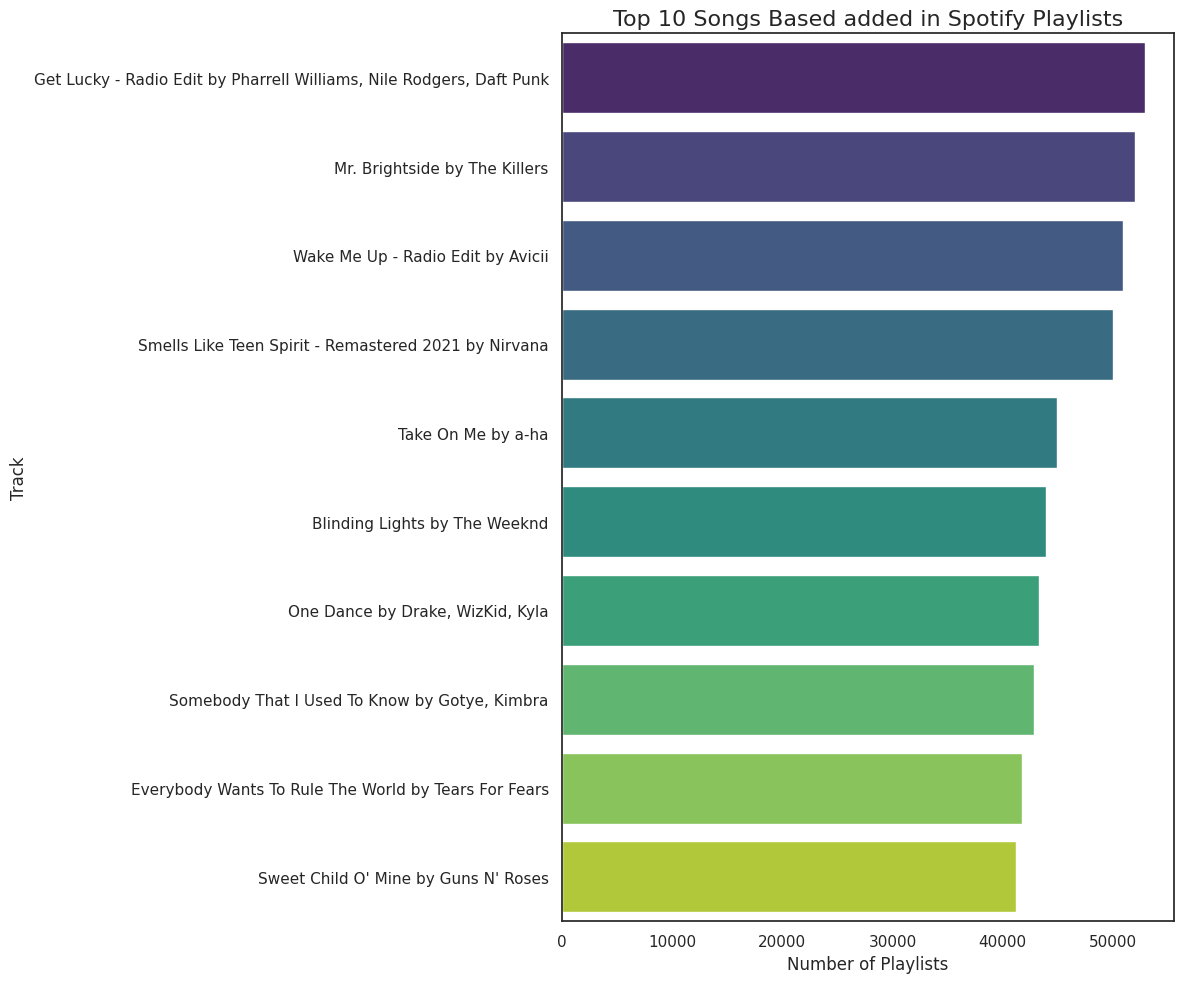

In [11]:
top_songs_in_playlists = df.sort_values(by='in_spotify_playlists', ascending=False).head(10)
top_songs_in_playlists['track_artist'] = top_songs_in_playlists['track_name'] + " by " + top_songs_in_playlists['artist(s)_name']

plt.figure(figsize=(12, 10))
sns.barplot(x=top_songs_in_playlists['in_spotify_playlists'], y=top_songs_in_playlists['track_artist'], 
            palette="viridis", orient='h')
plt.title('Top 10 Songs Based added in Spotify Playlists', fontsize=16)
plt.xlabel('Number of Playlists')
plt.ylabel('Track')
plt.tight_layout()
plt.show()

# Top 10 Artists Based on Total Streams

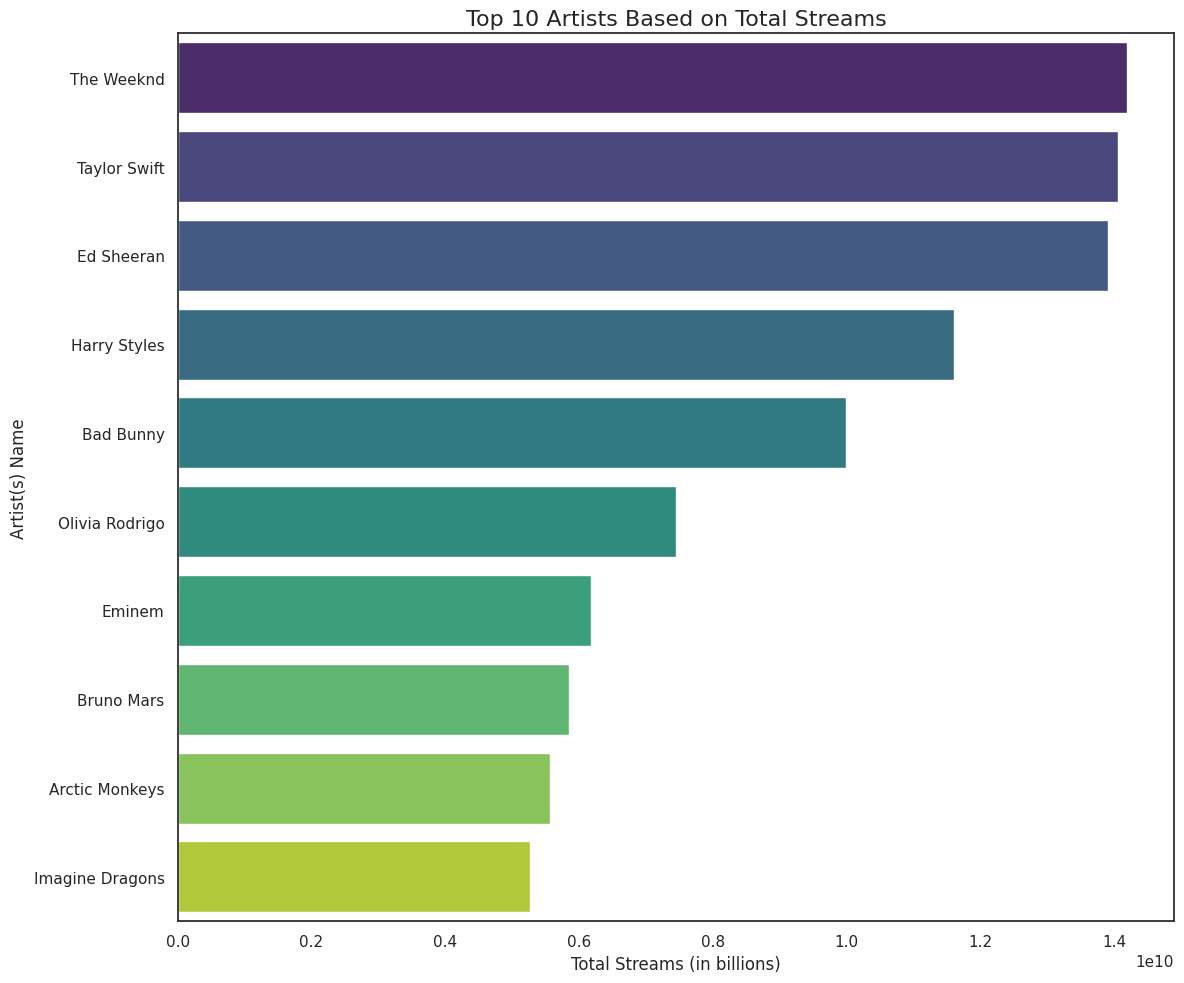

In [12]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Grouping by artist(s) again and summing up their streams
artist_streams = df.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(10)

# Plotting the artists with the most streams again
plt.figure(figsize=(12, 10))
sns.barplot(x=artist_streams.values, y=artist_streams.index, palette="viridis", orient='h')
plt.title('Top 10 Artists Based on Total Streams', fontsize=16)
plt.xlabel('Total Streams (in billions)')
plt.ylabel('Artist(s) Name')
plt.tight_layout()
plt.show()

In [13]:
df.rename(columns = {'danceability_%':'danceability','valence_%':'valence','energy_%':'energy','acousticness_%':'acousticness','instrumentalness_%':'instrumentalness','liveness_%':'liveness',
                    'speechiness_%':'speechiness'}, inplace = True)

# Finding Underrated Songs on Spotify

**Following criterias to be considered for finding underrated songs**
- There should be a limit on streams, to find underrated songs we will have to filter out the popular songs.
- The number of added in playlist should be high, which indicates listeners have liked that song.
- The song shouldn't be on any charts, which indicates the song wasn't discovered through any popular charts, but by word of mouth or exploration.


In [14]:
df[['in_spotify_playlists','streams','in_spotify_charts']].describe()

,in_spotify_playlists,streams,in_spotify_charts
count,953.000000,9.520000e+02,953.000000
mean,5200.124869,5.141374e+08,12.009444
std,7897.608990,5.668569e+08,19.575992
min,31.000000,2.762000e+03,0.000000
25%,875.000000,1.416362e+08,0.000000
50%,2224.000000,2.905309e+08,3.000000
75%,5542.000000,6.738690e+08,16.000000
max,52898.000000,3.703895e+09,147.000000


* Above data gives us an approximate value to apply our filters
* For streams we considered songs that have been streamed lower than the 25th percentile in the dataset
* For added in playlist, we only considered number that's more than 40th percentile in the dataset

In [15]:
df.query("streams < 140000000 & in_spotify_charts == 0 & in_spotify_playlists >  2000")

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
420,Rumble,"Skrillex, Flowdan, Fred again..",3,2022,1,17,2849,0,78489819.0,39,...,140,C#,Minor,81,6,84,5,23,6,6
475,Merry Christmas,"Ed Sheeran, Elton John",2,2017,11,10,2209,0,135723538.0,72,...,114,C,Major,59,60,94,24,0,10,4
483,Deck The Hall - Remastered 1999,Nat King Cole,1,1959,1,1,3299,0,127027715.0,65,...,107,F#,Minor,69,96,36,81,0,8,4
509,Gasoline,The Weeknd,1,2022,1,7,2297,0,116903579.0,11,...,123,F#,Minor,74,35,73,0,0,21,5
512,Take My Breath,The Weeknd,1,2021,8,6,2597,0,130655803.0,17,...,121,A#,Minor,70,35,77,1,0,26,4
557,Lï¿½ï¿½ï¿,Stromae,1,2022,1,9,2035,0,108809090.0,41,...,88,D,Minor,56,58,55,35,0,23,11
655,City of Gods,"Kanye West, Alicia Keys, Fivio Foreign",3,2022,2,11,2096,0,107255472.0,34,...,147,G#,Minor,47,50,80,10,0,32,38
769,Father Time (feat. Sampha),"Kendrick Lamar, Sampha",2,2022,5,13,3107,0,127309180.0,4,...,153,A#,Minor,55,50,78,19,0,11,35
774,Silent Hill,"Kendrick Lamar, Kodak Black",2,2022,5,13,3028,0,123216717.0,22,...,140,C#,Minor,92,78,57,46,0,14,9
776,Count Me Out,Kendrick Lamar,1,2022,5,13,2729,0,126191104.0,3,...,134,G,Major,78,51,43,69,0,14,9


# Finding Slow Sad Songs

- Sad songs are usually in a Minor key, most famous keys for sad songs are Dm, Fm, C#m.
- For our purpose, we will just sort out the songs with Major mode.
- We will consider songs which have low danceability, low valence and low energy.

In [16]:
df[['bpm','danceability','valence','energy']].describe()

,bpm,danceability,valence,energy
count,953.000000,953.00000,953.000000,953.000000
mean,122.540399,66.96957,51.431270,64.279119
std,28.057802,14.63061,23.480632,16.550526
min,65.000000,23.00000,4.000000,9.000000
25%,100.000000,57.00000,32.000000,53.000000
50%,121.000000,69.00000,51.000000,66.000000
75%,140.000000,78.00000,70.000000,77.000000
max,206.000000,96.00000,97.000000,97.000000


In [17]:
df.query("mode == 'Minor' & danceability < 50 & valence < 32 & energy< 53")

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
96,Say Yes To Heaven,Lana Del Rey,1,2023,3,17,2000,46,1.275675e+08,49,...,100,F#,Minor,49,17,35,71,9,11,3
128,lovely - Bonus Track,"Billie Eilish, Khalid",2,2017,8,11,15032,30,2.355720e+09,221,...,115,E,Minor,35,12,30,93,0,10,3
399,TV,Billie Eilish,1,2022,7,21,3009,2,3.385650e+08,68,...,141,E,Minor,41,9,25,84,1,14,4
412,Atlantis,Seafret,1,2015,4,22,3045,6,5.713864e+08,43,...,166,G#,Minor,40,23,48,5,0,12,3
425,Dream On,Aerosmith,1,1973,1,5,168,0,8.385868e+08,0,...,80,F,Minor,39,24,43,39,0,23,3
521,Dawn FM,The Weeknd,1,2022,1,7,811,0,5.393353e+07,1,...,78,A,Minor,27,10,49,62,0,49,5
523,Starry Eyes,The Weeknd,1,2022,1,7,1014,0,7.460146e+07,1,...,86,A,Minor,28,13,41,50,0,19,3
577,Phantom Regret by Jim,The Weeknd,1,2022,1,7,768,0,3.195957e+07,1,...,108,A,Minor,46,23,48,75,30,14,4
621,Lucid Dreams,Juice WRLD,1,2017,6,15,14749,0,2.288695e+09,188,...,84,B,Minor,44,22,48,38,0,33,24
625,Arcade,Duncan Laurence,1,2019,3,7,6646,0,9.913361e+08,107,...,72,A,Minor,45,27,33,82,0,14,4


# Pairplot to know relations between track features

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


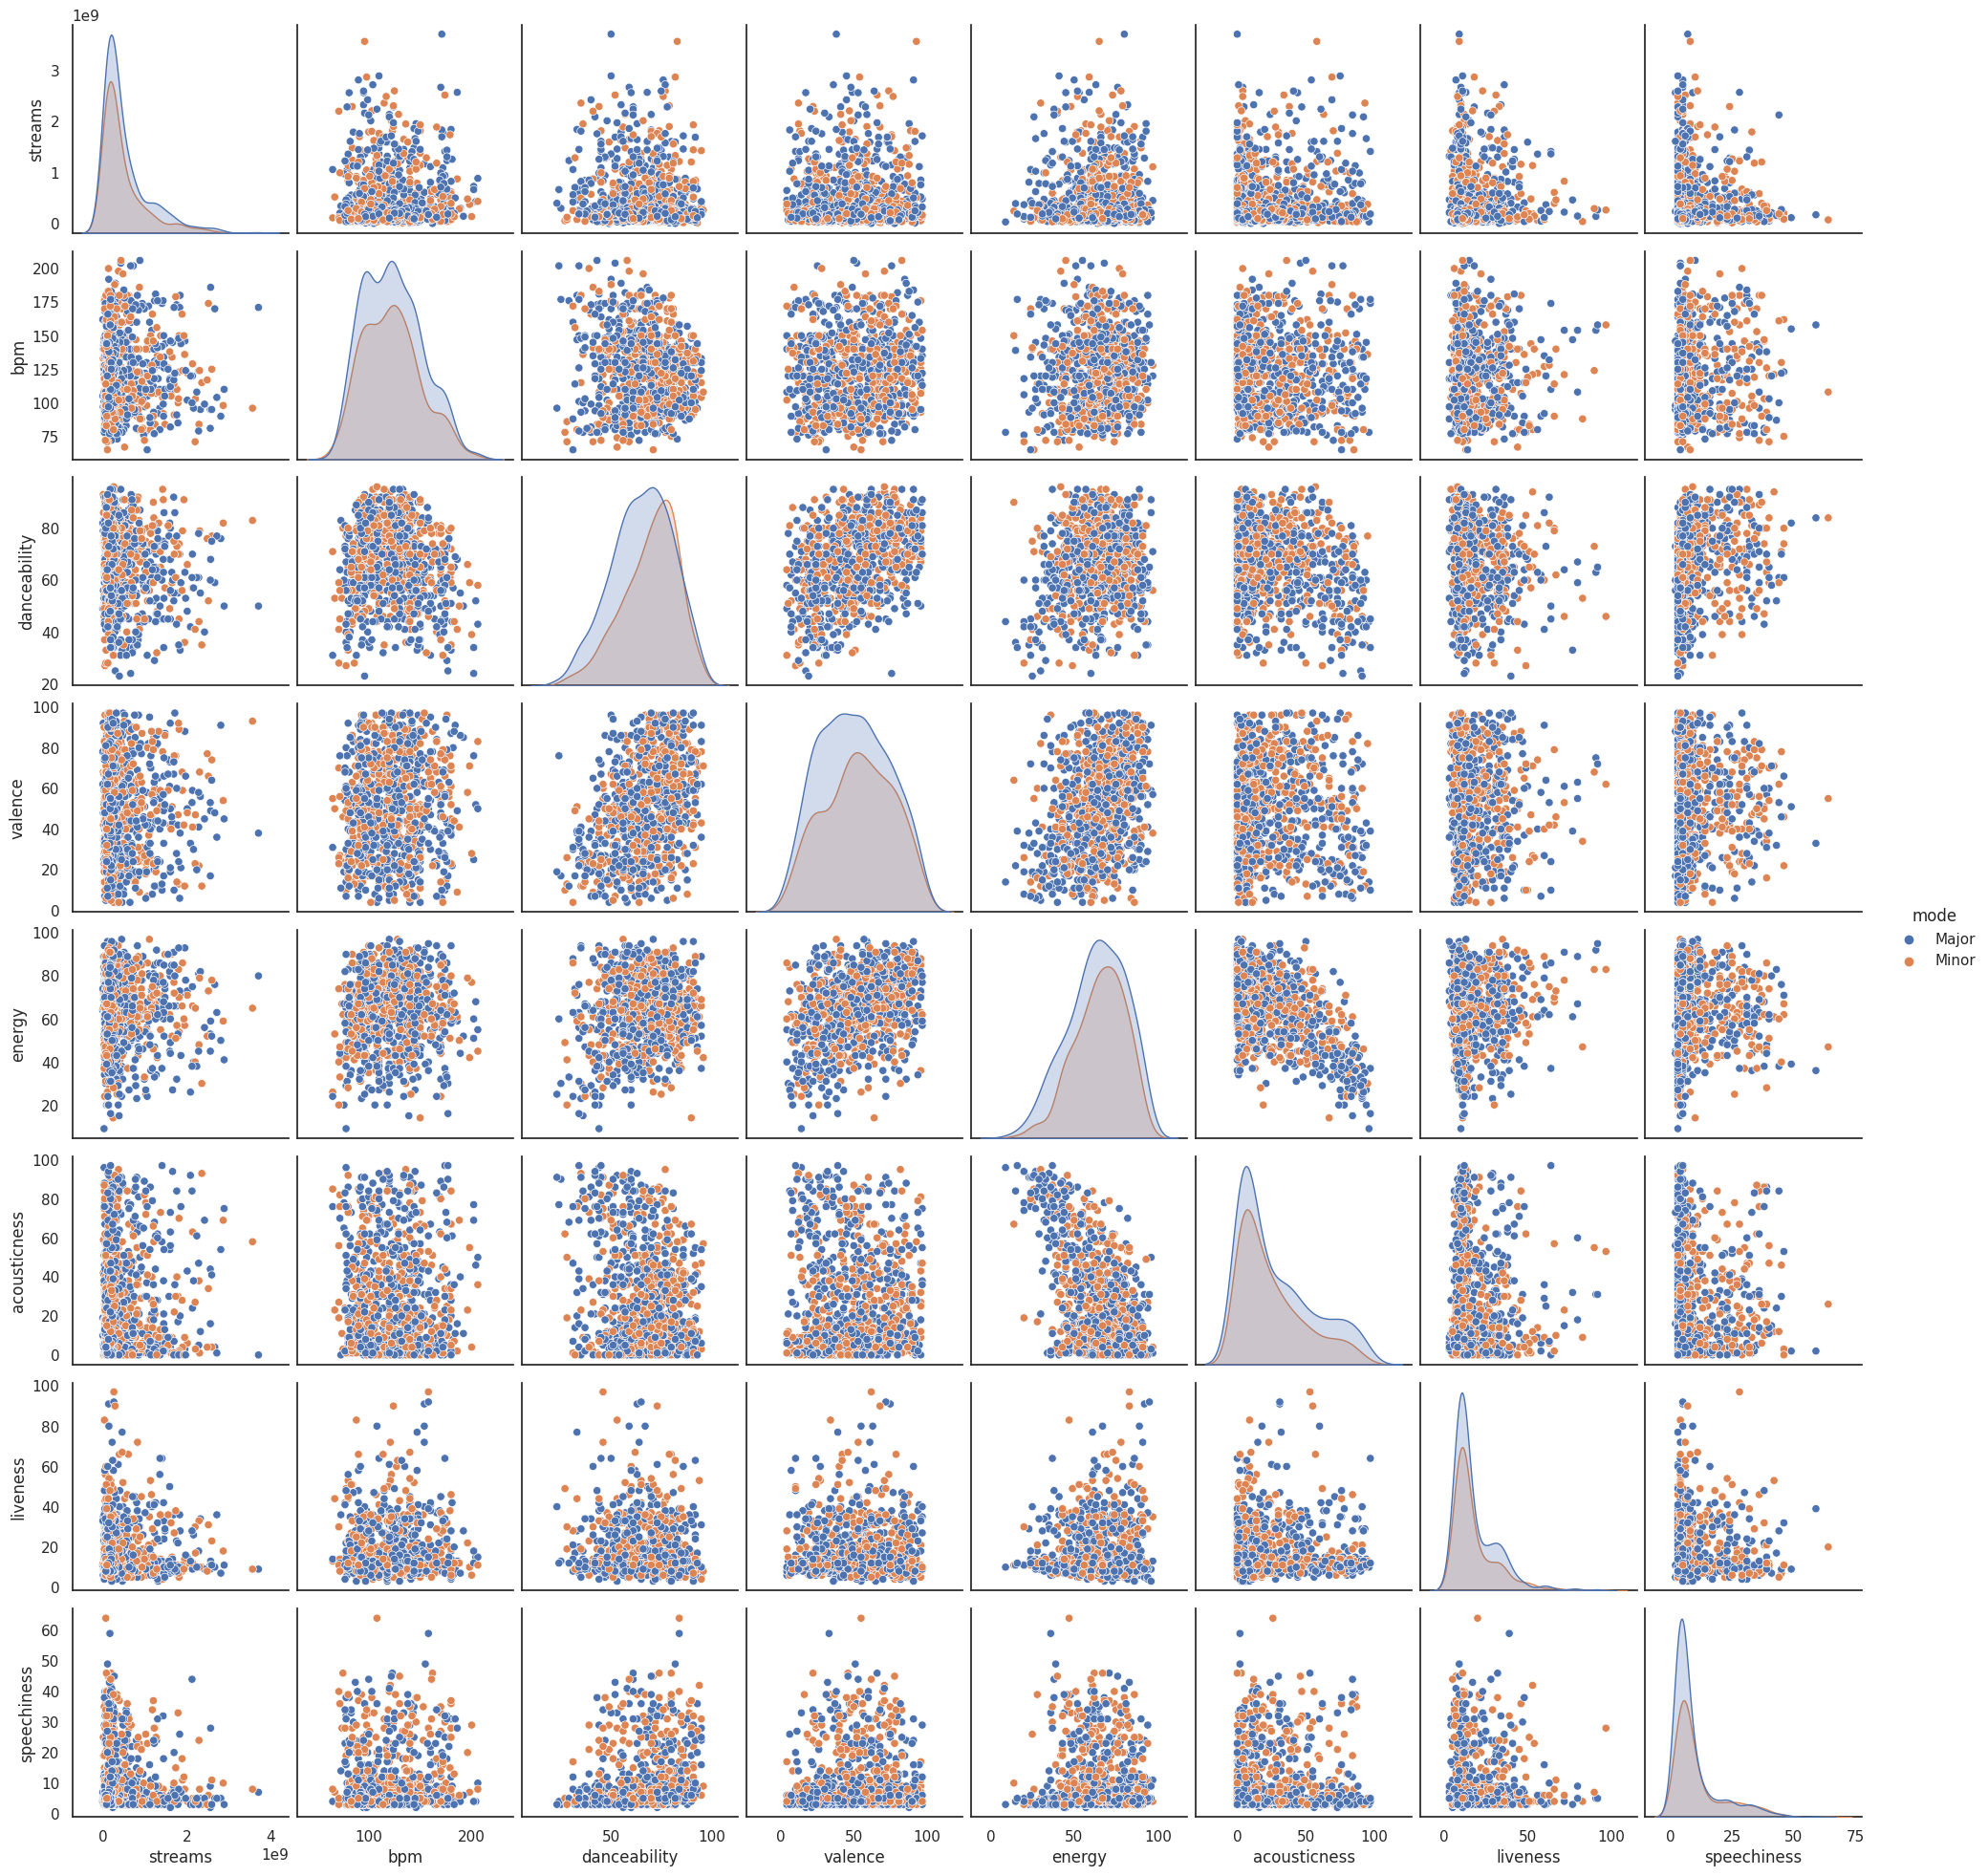

In [18]:
pairdf = df[['streams','bpm','danceability','valence','energy','acousticness','liveness','speechiness','mode']]
sns.pairplot(pairdf,hue="mode")

# Analysing most popular songs

In [19]:
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_deezer_playlists'].fillna(0,inplace=True)

In [20]:
df['in_total_playlist'] = df['in_spotify_playlists'] + df['in_apple_playlists'] + df['in_deezer_playlists']

In [21]:
df2 = df.sort_values(by=['streams'],ascending=False)
df2 = df2.head(500)

In [22]:
df2['VED'] = df2['danceability'] + df2['valence'] + df2['energy']

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


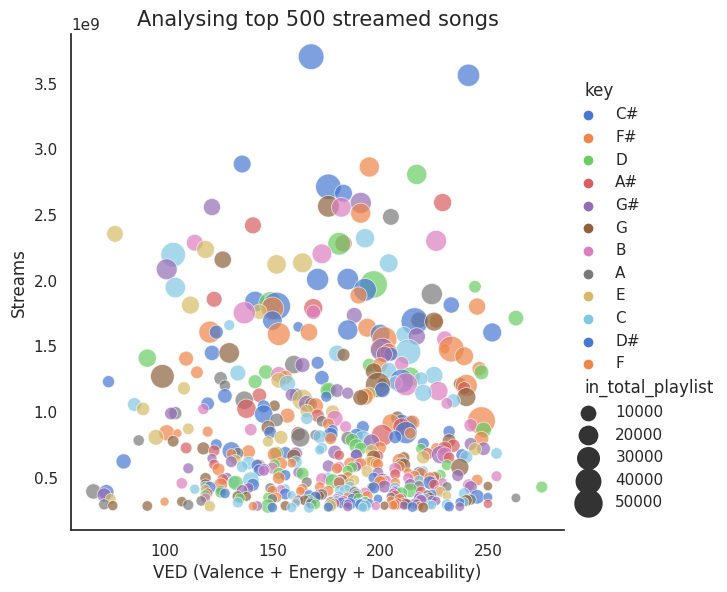

In [23]:
sns.set_theme(style="white")

sns.relplot(x="VED", y="streams", hue="key", size="in_total_playlist",
            sizes=(40, 400), alpha=.7,palette = 'muted',
            height=6, data=df2)

plt.title('Analysing top 500 streamed songs', fontsize=15)
plt.xlabel('VED (Valence + Energy + Danceability)')
plt.ylabel('Streams')
plt.show()